# Population vs. Sample Variance


## A few fundamental formulas:

mean $$ \mu_{x} = \frac{\sum x}{N}  $$

Polulation Variance $$ \sigma^{2} = \frac{\sum(x -\mu_{x})^{2}}{N}  $$

Unbiased Sample Variance $$ \sigma^{2} = \frac{\sum(x -\mu_{x})^{2}}{N-1}  $$

In [ ]:
import numpy as np

#generate an array
p = np.array([5,4,4,9,9,8,2,0,3,6])

#calculate mean and variance of array
pmean = p.mean()
pvar = np.var(p)

#take sample from array
s = np.array([5,4,9,8,2])

#calculuate sample mean and sample variance from sample set
smean = s.mean()
svar = np.var(s, ddof=1) #degree of freedom = 0 indicates a division by 0, as in n-0 in the variance formula


pmean, smean, pvar, svar

(5.0, 5.6, 8.2, 8.3)

50.217390597372926 820.9047247852839


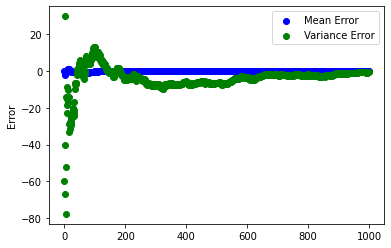

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm

#Generate 200 points
Npoints = 200
#set up arrays to record results
diffMean = []
diffVariance = []
bestMean = []
bestVar = []
#generate random distribution of points between 0 and 100
p = np.random.uniform(0, 100, Npoints)
#calculate mean and variance
pmean = p.mean()
pvar = np.var(p)

#take a sample and calculate mean and variance
N=1000



for i in range(N):
  sample = np.random.choice(p, 50)        #choose sample from population
  smean = sample.mean()                   #sample mean
  svar = np.var(sample, ddof=1)           #sample variance. ddof = 0 or 1 means divide by N or N-1, respectively. 
  
  diffMean.append(pmean-smean)            #mean difference between sample and population
  bestMean.append(np.sum(diffMean)/(len(diffMean))) #accumulate and average values in the array
  diffVariance.append(pvar-svar)          #variance difference between sample and population
  bestVar.append(np.sum(diffVariance)/len(diffVariance)) #accumlate and average the difference in variance. The hope is that the two averages converge. 

#plot results
plt.scatter(range(N), bestMean, color = 'b', label='Mean Error')
plt.ylabel('Error')
plt.scatter(range(N), bestVar, color='g', label='Variance Error')
plt.legend(loc='upper right')
print(pmean, pvar)


With initial prameters of 100 samples and 0 degrees of freedom, a convergence of variance is not observed. In fact, there is not a convergence with a greater number of samples either. The only way a convergence between the two arrays is observed is if the degree's of freedom is increased by 1. For this reason, sample variance is calculated realtive to N-1.This is challenging to prove mathematically but is clear when demonstrated numerically. 

To further illustrate the need for implementing a correction, consider the variance as a function of means in the following exercise. 

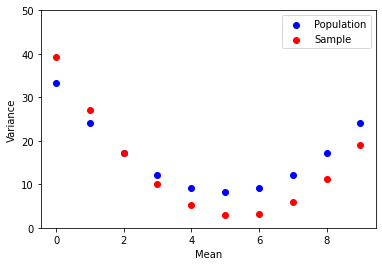

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

population = np.array([5, 4, 4, 9, 9, 8, 2, 0, 3, 6])
sample = np.array([5, 4, 4, 8, 6])


#create a function to calculate variance. Numpy function not used as it automatically calculates variance with a corrected mean
def variance(sample, mean, bias): #bias indicates degree's of freedom. Biased calculation would not remove a degree of freedom where unbiased removes 1 degree of freedom
    N = len(sample)
    s2 = 0
    for i in range(0,N):
        x = sample[i]-mean
        s2 = s2 + (x * x) 
    var = s2/(N - bias)
    return var

N = 10

var_pop = []
var_sample = []

#loop over the population mean and change to calcualte variance of population
for mean in range(0,N):   # shift the mean from 0 to N
    var_pop.append( variance(population, mean, 0))

#loop over the sample mean and calculate variance of sample
for mean in range(0,N):   # shift the mean from 0 to N
    var_sample.append( variance(sample, mean, 1))

# Plot both sample and population variance
plt.scatter(range(N),var_pop,color='b', label='Population')

plt.scatter(range(N),var_sample,color='r', label='Sample')
plt.ylim([0, 50])
plt.ylabel('Variance')
plt.xlabel('Mean')
plt.legend(loc='upper right')

As observed, the sample variance always underestimates the population variance when degree's of freedom are not corrected. As the mean increases, the underestimation increases. For this reason, a correction is always needed to correct for the underestimation. 

# Correlation and Covariance

Covariance is the measure of the relationship between two variables (i.e. if one varible increases, the other variable either increases or decreases). It is quantified by the covariance coefficient. 

0.6666666666666666

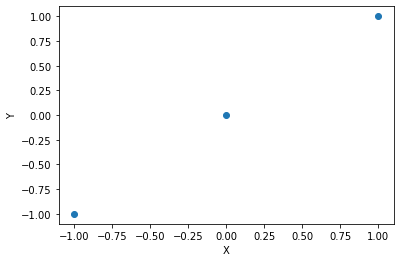

In [ ]:
#Covariance Calculation - results can vary from +infitiy to -infitity

#establish variables that are being evaluated
x = np.array([-1, 0., 1])
y = np.array([-1, 0., 1])

plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
cov = np.sum(x*y)/3
cov

The calculation, as noted above, does not scale well (i.e. values can go +/- infinity). For this reason, the Pearson Correlation Coefficient is used. 

In [ ]:
#Pearson Correlation Calculation

#First calculate the covariance coefficient
x = np.array([-1, 0., 1])
y = np.array([-100, 0., 100])
cov = np.sum(x*y)/3
print(cov)

#Then, for comparison, calculate the Pearson Correlation Coefficient
xy = x[0]*y[0] + x[1]*y[1] + x[2]*y[2]
xx = x[0]*x[0] + x[1]*x[1] + x[2]*x[2]
yy = y[0]*y[0] + y[1]*y[1] + y[2]*y[2]
xy = xy/np.sqrt(xx * yy)
xy

66.66666666666667


1.0

Calculate correlation with a dataframe

In [ ]:
import pandas as pd

#establish dataframe
data = {'X':x, 'Y':y}
df = pd.DataFrame(data)
corr = df.corr() #correlation coefficient in this function is always normalized so it's between 0 and 1
corr

,X,Y
X,1.0,1.0
Y,1.0,1.0


In [ ]:
#examine a larger dataframe
dict = {'A':[1,3,5], 'B':[5,2,2], 'C':[2,3,4]}
df = pd.DataFrame(dict)
df

,A,B,C
0,1,5,2
1,3,2,3
2,5,2,4


,A,B,C
A,1.000000,-0.866025,1.000000
B,-0.866025,1.000000,-0.866025
C,1.000000,-0.866025,1.000000


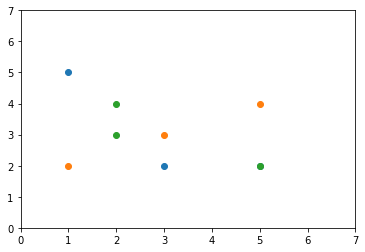

In [ ]:
plt.scatter('A', 'B', data=dict)
plt.scatter('A', 'C', data=dict)
plt.scatter('B', 'C', data=dict)
plt.axis([0,7,0,7])
corr = df.corr()
corr

# Central Limit Theorem

As observed, a sample mean isn't always reflective of the population mean. However, when working with samples from a population distribution, a collection of means will create a normal distribution around the population mean. Over several trials, the unbiased variance approximates the population variance. As sample size increases, the variance decreases (i.e. the error in the mean goes down).

In [ ]:
# flip coin and calculate mean and variance

s = np.random.randint(0,2,10000)

Va = s.var()
Sv = s.var(ddof = 1)
print(f'Pop Mean: {s.mean()}')
print(f'Pop Variance S2: {Va}')
print(f'Sample Unbiased Variance S2: {Sv}')

Pop Mean: 0.5034
Pop Variance S2: 0.24998843999999998
Sample Unbiased Variance S2: 0.2500134413441344


### mean and unbiased variance


$$ \sigma_x = \sqrt{ \frac{\sum(x -\mu_{x})*(x -\mu_{x})}{N} } = \sqrt{\frac{\sum X*X}{N}}$$
#### Note that the values range between +1 and -1

In [ ]:
# roll 6 sided dice and calculate mean and variance
s = np.random.randint(1,7,100000)
Va = s.var()                       # population variance
Sv = s.var(ddof=1)
print(f'Pop Mean: {s.mean()}')
print(f'Pop Variance S2: {Va}')
print(f'Sample Unbiased Variance S2: {Sv}')

Pop Mean: 3.49521
Pop Variance S2: 2.9180570559000008
Sample Unbiased Variance S2: 2.9180862367623686


For trials where we take M tickets  
Trial Mean $$ \mu_{x} = \frac{\sum x}{M}  $$

Sample Distribution Variance is Population Variance divided by our M  
$$ s^{2} = \frac{\sigma^{2}}{M}  $$

Pop Variance S2: 2.9173545984
var Sample: 0.52592816
var Sample: 0.13558356000000005
var Sample: 0.028655902399999995
Best Estimate N*S2_sample : [2.6296408, 2.711671200000001, 2.8655902399999995]
Unbiased Estimate :  2.962727272727272
Biased Estimate :    2.9330999999999996


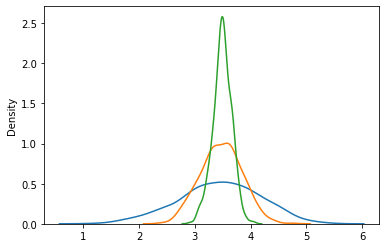

In [ ]:
import seaborn as sns

#  Central Limit Theorem Applied to Rolls of 6 sided dice 
#  Sample from Box taking n Tickets - then calc. mean and variance 
s = np.random.randint(1,7,100000)  # Create the box of tickets                       # population variance
print(f'Pop Variance S2: {s.var()}')
N = 500                            # number of trials  
V = []

def getDistribution(s,M,N):        # args(samplePop, samplesize, num_samples)
    samples = []
    np.random.seed(seed=3)
    for i in np.arange(N):
        sample = np.random.choice(s,M).sum()/M
        samples.append(sample)
    return samples

for M in [5,20,100]:               # Change the sample size and loop
    S = getDistribution(s,M,N)     
    s2 = np.array(S).var(ddof=0)   # Variance of the mean for sample
    V.append({M:s2})               # Variance of Mean ve goes down with sample size  ve * i = pop sample variancee
    #plt.hist(S, bins=20, density=True, alpha = 0.2)
    sns.kdeplot(data=S)
    print(f'var Sample: {s2}')
                                   # print out the sample variance * N (sample number)
print(f'Best Estimate N*S2_sample : {[list(var.keys())[0] * list(var.values())[0]  for index, var in enumerate(V)]}')

testSample = np.array(np.random.choice(s,100))
print(f'Unbiased Estimate :  {testSample.var(ddof =1)}')
print(f'Biased Estimate :    {testSample.var(ddof =0)}')


This illustrates the Central Limit Theorem: with increasing mean's, the variance (of the mean) decreases. 

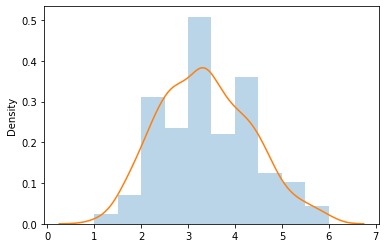

In [25]:
s = np.random.randint(1,7,100)
N = 1000   # number of times we take sample
n = 3     # sample size 
samples = []
for i in np.arange(N):
    sample = np.random.choice(s,n).sum()/n
    samples.append(sample)
plt.hist(samples, bins=10, density=True, alpha = 0.3)
sns.kdeplot(data=samples)

In [26]:
# understand how scaling a*x + b  affects mean and variance
# N(mu,sigma**2)   =>  N(a*mu + b,  a**2 * sigma**2)
n = 4                           # number in sample
np.random.seed(seed = 1)
s = np.random.randint(1,7,n)    # get sample 
a = 1                           # scale factor = a
b = 0                           # shift = b
s1 = s + s
print(f'sample: {s} mean: {s.mean()} variance: {s.var()}' )
print(f'ScaleS: {s1} mean: {s1.mean()} variance: {s1.var()}' )


sample: [6 4 5 1] mean: 4.0 variance: 3.5
ScaleS: [12  8 10  2] mean: 8.0 variance: 14.0


# Application of Correlation Concepts

Use basic statistics to understand whether there is a correlation of wine or spirits with Beer in Asia

In [ ]:
import pandas as pd
import numpy as np

drinks = pd.read_csv('http://bit.ly/drinksbycountry')

#Pull out drinks from Asia
asia = drinks.loc[drinks['continent'] == 'Asia']
asia.head()

#assess correlation
asia.corr()


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.694426,0.437488,0.899253
spirit_servings,0.694426,1.000000,0.225150,0.772893
wine_servings,0.437488,0.225150,1.000000,0.533320
total_litres_of_pure_alcohol,0.899253,0.772893,0.533320,1.000000


Based on this assessment, Spirits have a stronger correlation than wine

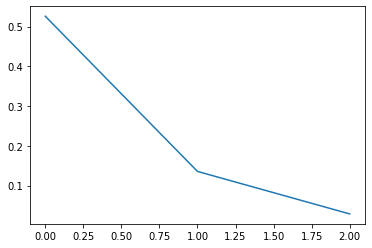

In [27]:
variance = [list(v.values())[0]   for i,v in enumerate(V)]
plt.plot(variance)

 mean1: 1.0352141425351744 variance: 0.9655633184785181
 mean2: 1.0306395005446571 variance: 1.0551410753865211
 mean12: 2.0658536430798313 variance2: 2.061049114188966


(array([0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5,
        0. , 0. , 0. , 0.5, 0. , 0. , 0.5]),
 array([ 2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,
         7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. ]),
 <a list of 20 Patch objects>)

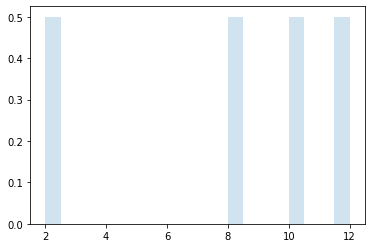

In [28]:
# what happens if we add two distributions
mu = 1
sigma = 1
s1 = np.random.normal(mu,sigma, 1000)
s2 = np.random.normal(mu,sigma, 1000)
S = s1 + s2                 # be careful - what does numpy do here

print(f' mean1: {s1.mean()} variance: {s1.var()}' )
print(f' mean2: {s2.mean()} variance: {s2.var()}' )
print(f' mean12: {S.mean()} variance2: {S.var()}' )

#plt.hist(s, bins = 20, alpha = 0.2, density=True)
plt.hist(s+s,bins = 20,  alpha = 0.2, density=True)

var1: 0.019679306645486623 var2: 0.019679306645486623


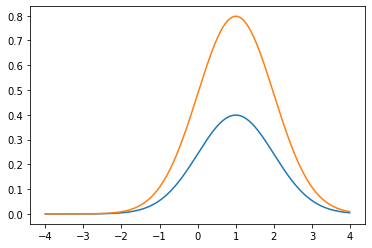

In [29]:
#  Plot from CFD curve - be careful - are we sampling population at all here ?
mu = 1
sigma = 1.000
N = 2
def normal(x, mu, sigma):
    c = 1/(sigma*np.sqrt(2*np.pi))
    return c * np.exp( -0.5*(x - mu)*(x - mu)/(sigma*sigma))
x = np.arange(-4,4,0.01)

y = normal(x, mu, sigma)
y1 = normal(x, mu, sigma)


plt.plot(x,y)
plt.plot(x,y + y1)

print(f'var1: {y.var()} var2: {y1.var()}')